In [1]:
# Stress Detection with Machine Learning

In [2]:
#https://thecleverprogrammer.com/2021/12/20/stress-detection-with-machine-learning/

In [3]:
# https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [5]:
data.shape

(2838, 116)

In [6]:
data.dtypes

subreddit                    object
post_id                      object
sentence_range               object
text                         object
id                            int64
                             ...   
lex_dal_avg_pleasantness    float64
social_upvote_ratio         float64
social_num_comments           int64
syntax_fk_grade             float64
sentiment                   float64
Length: 116, dtype: object

In [7]:
data.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [8]:
data.info

<bound method DataFrame.info of              subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     October 

In [9]:
data.describe

<bound method NDFrame.describe of              subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     Octobe

In [10]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


let’s prepare the text column of this dataset to clean the text column with stopwords, links, special symbols and language errors

In [11]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

Now let’s have a look at the most used words by the people sharing about their life problems on social media by visualizing a word cloud of the text column:

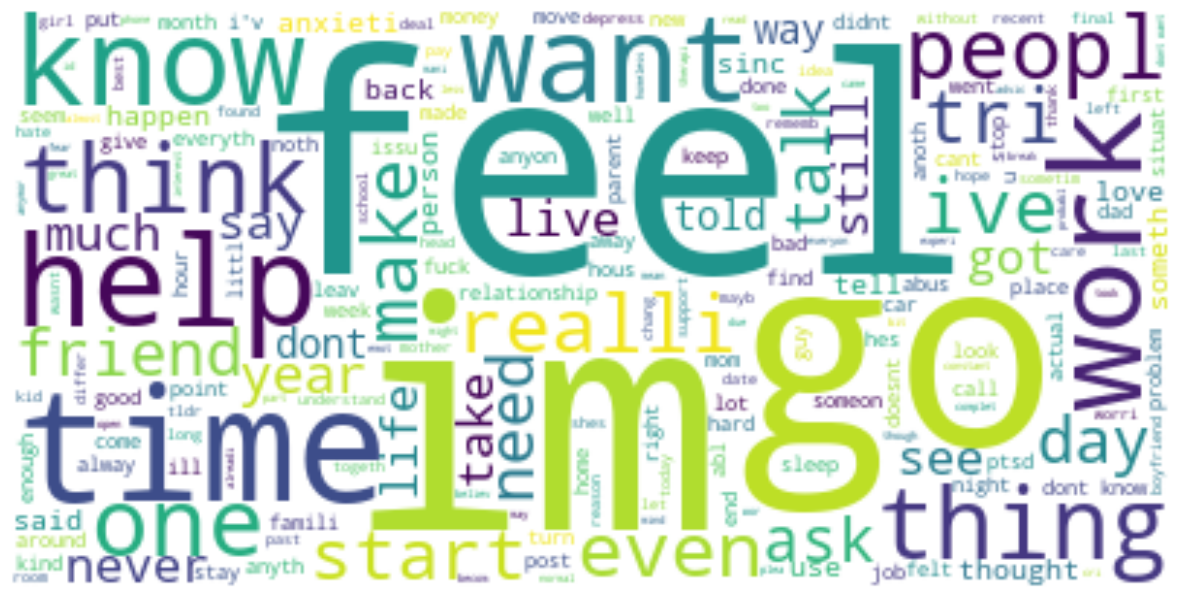

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Stress Detection Model
The label column in this dataset contains labels as 0 and 1. 0 means no stress, and 1 means stress. I will use Stress and No stress labels instead of 1 and 0. So let’s prepare this column accordingly and select the text and label columns for the process of training a machine learning model

In [14]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

In [17]:
# As this task is based on the problem of binary classification,
# I will be using the Bernoulli Naive Bayes algorithm,
# which is one of the best algorithms for binary classification problems. So let’s train the stress detection model:

from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model.fit(xtrain, ytrain)

BernoulliNB()

In [21]:
y_pred_train= model.predict(xtrain)
y_pred_test = model.predict(xtest)

In [22]:
# Now, we analyze our model and generate the results. 

print(model.score(xtrain, ytrain)*100)
print(model.score(xtest, ytest)*100)

91.95160441872699
74.70651013874067


In [23]:
# we will also generate classification reports for training and testing sets. 

# For training set:-

#for training set 
from sklearn.metrics import classification_report
print(classification_report(ytrain, y_pred_train))

              precision    recall  f1-score   support

   No Stress       0.95      0.87      0.91       906
      Stress       0.89      0.96      0.93       995

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



In [24]:
#for testing set 
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_test))

              precision    recall  f1-score   support

   No Stress       0.79      0.64      0.70       444
      Stress       0.72      0.85      0.78       493

    accuracy                           0.75       937
   macro avg       0.75      0.74      0.74       937
weighted avg       0.75      0.75      0.74       937



In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
# compute the confusion matrix
cm = confusion_matrix(ytest,y_pred_test)

In [27]:
print(cm)

[[283 161]
 [ 76 417]]


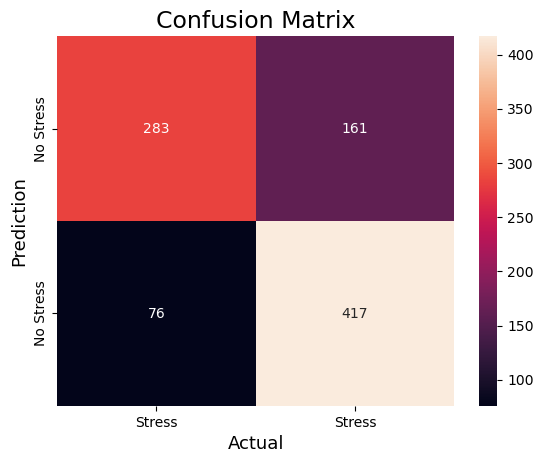

In [28]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Stress', 'Stress'],
            yticklabels=['No Stress', 'No Stress'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [30]:
# Finding precision and recall
accuracy = accuracy_score(ytest, y_pred_test)
print("Accuracy   :", accuracy)


Accuracy   : 0.7470651013874067


precision = precision_score(ytest, y_pred_test)
print("Precision :", precision)
recall = recall_score(ytest, y_pred_test)
print("Recall    :", recall)
F1_score = f1_score(ytest, y_pred_test)
print("F1-score  :", F1_score)

In [18]:
# Now let’s test the performance of our model on some random sentences based on mental health:


user = input("Enter a Text: ")

data = cv.transform([user]).toarray()

output = model.predict(data)

print(output)

Enter a Text: I am very happy today to get a Meditation sitting
['No Stress']


In [20]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: I felt sad as Shauriya has hit Mukil today
['Stress']


So as you can see, we can see good results from our machine learning model. This is how you can train a stress detection model to detect stress from social media posts. This machine learning model can be improved by feeding it with more data.

Summary
So this is how you can train a machine learning model to detect stress from social media posts. People often share their feelings on social media platforms. Many organizations can use stress detection to find which social media users are stressed to help them quickly.